# Table of Contents

0.1 Importing Libraries

0.2 Importing Data

0.3 Exploring Original Df

0.4 Create new columns

    0.4.1  price_range 

    0.4.2  busiest_day 

    0.4.3  busiest_days 
    
    0.4.4  busiest_period_of_day 
    
    0.4.5  max_order
    
    0.4.6  loyalty_flag
    
    0.4.7  mean_spending
    
    0.4.8  spender_type
    
    0.4.9  median_days_since_ordering
    
    0.4.10 frequent_shopper

0.5 Confirming Final Df 
    --> Adjusting datatypes of new columns to be more appropriate

0.6 Exporting Final Df

### 0.1 Importing Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os

### 0.2 Importing Data

In [2]:
# Identify the file pathway to data files
path = r'C:\Users\CJ\Documents\_CJ-Stuff\Career Foundry\Data Immersion\Ach 4 - Python\2023-03 Instacart Basket Analysis'

In [3]:
# Import data
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged.pkl'))

### 0.3 Exploring Original Df

In [4]:
df.shape

(32434489, 16)

In [5]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order_of_new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,price,product_info_available,price_available
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77.0,7.0,9.0,True,True
1,2539329,1,1,2,8,NaN,True,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,True,True
2,2539329,1,1,2,8,NaN,True,12427,3,0,Original Beef Jerky,23.0,19.0,4.4,True,True
3,2539329,1,1,2,8,NaN,True,26088,4,0,Aged White Cheddar Popcorn,23.0,19.0,4.7,True,True
4,2539329,1,1,2,8,NaN,True,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,True,True


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434489 entries, 0 to 32434488
Data columns (total 16 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   order_id                     int64  
 1   user_id                      int64  
 2   order_number                 int16  
 3   order_day_of_week            int8   
 4   order_hour_of_day            int8   
 5   days_since_prior_order       float16
 6   first_order_of_new_customer  bool   
 7   product_id                   int32  
 8   add_to_cart_order            int16  
 9   reordered                    int8   
 10  product_name                 object 
 11  aisle_id                     float16
 12  department_id                float16
 13  price                        float32
 14  product_info_available       bool   
 15  price_available              bool   
dtypes: bool(3), float16(3), float32(1), int16(2), int32(1), int64(2), int8(3), object(1)
memory usage: 1.7+ GB


In [7]:
# Checking for nulls
df.isnull().sum()

order_id                             0
user_id                              0
order_number                         0
order_day_of_week                    0
order_hour_of_day                    0
days_since_prior_order         2078068
first_order_of_new_customer          0
product_id                           0
add_to_cart_order                    0
reordered                            0
product_name                     30770
aisle_id                         30770
department_id                    30770
price                            35897
product_info_available               0
price_available                      0
dtype: int64

In [8]:
# The null values for days_since_prior_order 
# are flagged by first_order of new customer
df['first_order_of_new_customer'].value_counts()

False    30356421
True      2078068
Name: first_order_of_new_customer, dtype: int64

In [9]:
# The null values for price
# are flagged by price_available
df['price_available'].value_counts()

True     32398592
False       35897
Name: price_available, dtype: int64

In [10]:
# The null values for product_name, aisle_id, and department_id 
# are flagged by product_info_available
df['product_info_available'].value_counts()

True     32403719
False       30770
Name: product_info_available, dtype: int64

In [11]:
df.describe()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,price
count,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,30356421.0,3.243449e+07,3.243449e+07,3.243449e+07,32403719.0,32403719.0,3.239859e+07
mean,1.710749e+06,1.029372e+05,1.714205e+01,2.738818e+00,1.342498e+01,NaN,2.557634e+04,8.351076e+00,5.896975e-01,NaN,NaN,7.605043e+00
std,9.873007e+05,5.946648e+04,1.753504e+01,2.090049e+00,4.246365e+00,0.0,1.409669e+04,7.126671e+00,4.918886e-01,0.0,0.0,4.100934e+00
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.0,1.000000e+00,1.000000e+00,0.000000e+00,1.0,1.0,1.000000e+00
25%,8.559430e+05,5.142100e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.0,1.353000e+04,3.000000e+00,0.000000e+00,31.0,4.0,4.200000e+00
50%,1.711048e+06,1.026110e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.0,2.525600e+04,6.000000e+00,1.000000e+00,83.0,9.0,7.400000e+00
75%,2.565514e+06,1.543910e+05,2.400000e+01,5.000000e+00,1.600000e+01,15.0,3.793500e+04,1.100000e+01,1.000000e+00,107.0,16.0,1.130000e+01
max,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,30.0,4.968800e+04,1.450000e+02,1.000000e+00,134.0,21.0,2.500000e+01


### 0.4.1  price_range 

In [12]:
# Creating a column 'price_range' with values based on the 'prices' column:
#    If price is <= 5, then 'Low-range product'
#    If price is >5 and <=15, then 'Mid-range product'
#    If price is >15, then 'High-range product'

In [13]:
df.loc[df['price'] > 15, 'price_range'] = 'High-range product'

In [14]:
df.loc[(df['price'] <= 15) & (df['price'] > 5), 'price_range'] = 'Mid-range product' 

In [15]:
df.loc[df['price'] <= 5, 'price_range'] = 'Low-range product'

In [16]:
# Checking the results of the function

df['price_range'].value_counts(dropna = False)

Mid-range product     21860282
Low-range product     10125759
High-range product      412551
NaN                      35897
Name: price_range, dtype: int64

There are 32,434,489 total rows in the df, of which 32,398,892 have labels and 35,897 are null/missing prices (which is what we expect based on the flag price_available)

In [17]:
df[['product_id', 'price', 'price_range']].head()

,product_id,price,price_range
0,196,9.0,Mid-range product
1,14084,12.5,Mid-range product
2,12427,4.4,Low-range product
3,26088,4.7,Low-range product
4,26405,1.0,Low-range product


In [18]:
df.shape

(32434489, 17)

###     0.4.2  busiest_day 

In [19]:
# Exploring the data in 'order_day_of_week'
df['order_day_of_week'].value_counts(dropna = False)

0    6209666
1    5665856
6    4500304
2    4217798
5    4209533
3    3844117
4    3787215
Name: order_day_of_week, dtype: int64

In [20]:
# Create loop to label each order day as 
# busiest (0=Sat), least busy (4=Weds) 
# or regularly busy (all other days) 

result = []

for value in df["order_day_of_week"]:
  if value == 0:
    result.append("Busiest day")
  elif value == 4:
    result.append("Least busy")
  else:
    result.append("Regularly busy")

In [21]:
# Exploring results of loop
result

['Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy

In [22]:
df['busiest_day'] = result

In [23]:
# Confirming the data in 'busiest_day'
df['busiest_day'].value_counts(dropna = False)

Regularly busy    22437608
Busiest day        6209666
Least busy         3787215
Name: busiest_day, dtype: int64

In [24]:
# Comparing to frequency of order_day_of_week
# 0    6209666 MATCHES 'Busiest day' count
# 1    5665856  \
# 6    4500304   \
# 2    4217798   Sum of other days MATCHES 'Regularly busy' count
# 5    4209533   /
# 3    3844117  /
# 4    3787215 MATCHES 'Least busy' count

In [25]:
df[['order_day_of_week', 'busiest_day']].head()

,order_day_of_week,busiest_day
0,2,Regularly busy
1,2,Regularly busy
2,2,Regularly busy
3,2,Regularly busy
4,2,Regularly busy


In [26]:
df.shape

(32434489, 18)

In [27]:
# Cleaning up memory
del result

###    0.4.3  busiest_days 

In [28]:
# Create loop to label days as 
# busiest two days (0-1=Sat-Sun), least busy two days (3-4= Tues-Weds) 
# or regularly busy (all other days) 

result2 = []

for value in df["order_day_of_week"]:
  if (value == 0) or (value == 1):
    result2.append("Busiest days")
  elif (value == 4) or (value == 3):
    result2.append("Least busy days")
  else:
    result2.append("Regularly busy days")

In [29]:
result2

['Regularly busy days',
 'Regularly busy days',
 'Regularly busy days',
 'Regularly busy days',
 'Regularly busy days',
 'Least busy days',
 'Least busy days',
 'Least busy days',
 'Least busy days',
 'Least busy days',
 'Least busy days',
 'Least busy days',
 'Least busy days',
 'Least busy days',
 'Least busy days',
 'Least busy days',
 'Least busy days',
 'Least busy days',
 'Least busy days',
 'Least busy days',
 'Least busy days',
 'Least busy days',
 'Least busy days',
 'Least busy days',
 'Least busy days',
 'Least busy days',
 'Least busy days',
 'Least busy days',
 'Least busy days',
 'Regularly busy days',
 'Regularly busy days',
 'Regularly busy days',
 'Regularly busy days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Least busy da

In [30]:
df['busiest_days'] = result2

In [31]:
# Exploring the data in 'busiest_day'
df['busiest_days'].value_counts(dropna = False)

Regularly busy days    12927635
Busiest days           11875522
Least busy days         7631332
Name: busiest_days, dtype: int64

In [32]:
# Comparing to frequency of order_day_of_week
# 0    6209666 \ MATCHES 'Busiest days' count
# 1    5665856 /
# 6    4500304  \
# 2    4217798   Sum of other days MATCHES 'Regularly busy days' count
# 5    4209533  /
# 3    3844117 \
# 4    3787215 / MATCHES 'Least busy days' count

In [33]:
# Confirming the data
df[['order_day_of_week', 'busiest_day', 'busiest_days']].head()

,order_day_of_week,busiest_day,busiest_days
0,2,Regularly busy,Regularly busy days
1,2,Regularly busy,Regularly busy days
2,2,Regularly busy,Regularly busy days
3,2,Regularly busy,Regularly busy days
4,2,Regularly busy,Regularly busy days


In [34]:
df.shape

(32434489, 19)

In [35]:
# Cleaning up memory
del result2

###   0.4.4  busiest_period_of_day 

First, we explore the data in 'order_hour_of_day' in order to determine the best cut-offs for 'Most orders' vs. 'Average orders' vs. 'Fewest orders'

In [36]:
# Exploring the data in 'order_hour_of_day' to determine where best to
df['order_hour_of_day'].value_counts(dropna = False)

10    2764426
11    2738582
14    2691548
15    2664533
13    2663292
12    2620847
16    2537458
9     2456713
17    2089465
8     1719973
18    1637923
19    1259401
20     977038
7      891937
21     796370
22     634734
23     402620
6      290795
0      218948
1      115786
5       88062
2       69434
4       53283
3       51321
Name: order_hour_of_day, dtype: int64

In [37]:
df['order_hour_of_day'].describe()

count    3.243449e+07
mean     1.342498e+01
std      4.246365e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.300000e+01
75%      1.600000e+01
max      2.300000e+01
Name: order_hour_of_day, dtype: float64

<AxesSubplot:ylabel='Frequency'>

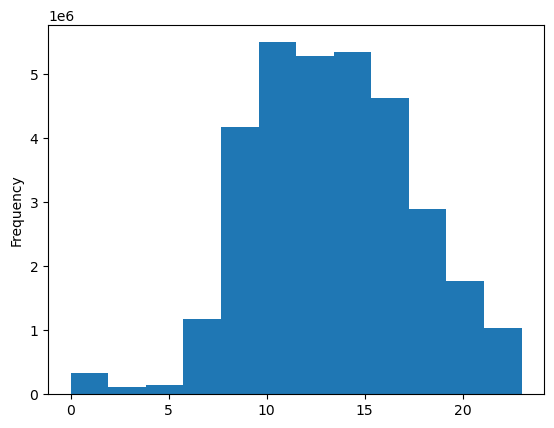

In [38]:
df['order_hour_of_day'].plot.hist(bins=12)

We're going to define the top 25% busiest hours as 'most busy, the bottom roughly 30% as least busy, and the middle as average.

'Most orders' = times where orders >= 2.6 million

   = 10 a.m.- 3 p.m.

'Average orders' = times where orders < 2.6 million but >= 40 thousand

   = 4-11 p.m. and 7-9 a.m.

'Fewest orders' = times when orders <1.5 million 

   = 12-6 a.m.

In [39]:
# Creating a column 'busiest_period_of_day' with values based on the 'order_hour_of_day' column:
#    If hour is <= 15 and >9, then 'Most orders'
#    If hour is <= 23 and >15, then 'Average orders'
#    If hour is <= 9 and >6, then 'Average orders'
#    If hour is <6, then 'Fewest orders'

In [40]:
df.loc[(df['order_hour_of_day'] <= 15) & (df['order_hour_of_day'] > 9), 'busiest_period_of_day'] = 'Most orders'

In [41]:
df.loc[(df['order_hour_of_day'] <= 23) & (df['order_hour_of_day'] > 15), 'busiest_period_of_day'] = 'Average orders' 

In [42]:
df.loc[(df['order_hour_of_day'] <= 9) & (df['order_hour_of_day'] > 6), 'busiest_period_of_day'] = 'Average orders' 

In [43]:
df.loc[df['order_hour_of_day'] <= 6, 'busiest_period_of_day'] = 'Fewest orders'

In [44]:
# Checking the results

df['busiest_period_of_day'].value_counts()

Most orders       16143228
Average orders    15403632
Fewest orders       887629
Name: busiest_period_of_day, dtype: int64

Count of values in busiest_period_of_day matches the sum of the counts for the corresponding time periods in order_hour_of_day

In [45]:
df[['order_hour_of_day', 'busiest_period_of_day']].head()

,order_hour_of_day,busiest_period_of_day
0,8,Average orders
1,8,Average orders
2,8,Average orders
3,8,Average orders
4,8,Average orders


In [46]:
df.shape

(32434489, 20)

### 0.4.5  max_order

In [47]:
# Create a new column 'max_order'
# By first grouping data by user_id, then
# appling the transform() function to the order_number column
# with the np.max argument so that it will pull the maximum value
df['max_order'] = df.groupby(['user_id'])['order_number'].transform(np.max)

In [48]:
# Confirming the results
df[['order_number', 'max_order']].head()

,order_number,max_order
0,1,10
1,1,10
2,1,10
3,1,10
4,1,10


In [49]:
df.shape

(32434489, 21)

### 0.4.6  loyalty_flag

In [50]:
# Creating a loyalty_flag column where
# users with > 40 orders are 'Loyal customers'
# users with <=40 but >10 orders are 'Regular customers'
# users with <=10 orders are 'New customers'

In [51]:
df.loc[df['max_order'] > 40, 'loyalty_flag'] = 'Loyal customer'

In [52]:
df.loc[(df['max_order'] <= 40) & (df['max_order'] > 10), 'loyalty_flag'] = 'Regular customer'

In [53]:
df.loc[df['max_order'] <= 10, 'loyalty_flag'] = 'New customer'

In [54]:
# Checking over df to make sure column was added correctly
df[['user_id', 'order_number', 'loyalty_flag']].head()

,user_id,order_number,loyalty_flag
0,1,1,New customer
1,1,1,New customer
2,1,1,New customer
3,1,1,New customer
4,1,1,New customer


In [55]:
df.shape

(32434489, 22)

In [56]:
df['loyalty_flag'].value_counts()

Regular customer    15891172
Loyal customer      10293959
New customer         6249358
Name: loyalty_flag, dtype: int64

###     0.4.7  mean_spending

In [57]:
# Create a new column 'mean_spending'
# By first grouping data by user_id, then
# appling the transform() function to the prices column
# with the np.mean argument
df['mean_spending'] = df.groupby(['user_id'])['price'].transform(np.mean)

In [58]:
# Confirming the column was created correctly
df[['user_id', 'mean_spending']].head()

,user_id,mean_spending
0,1,6.367797
1,1,6.367797
2,1,6.367797
3,1,6.367797
4,1,6.367797


In [59]:
df.shape

(32434489, 23)

###  0.4.8  spender_type

In [60]:
# Creating a spender_type column where
# user with <10 mean product price is 'Low spender'
# user with >=10 mean product price is 'High spender'

In [61]:
df.loc[df['mean_spending'] < 10, 'spender_type'] = 'Low spender'

In [62]:
df.loc[df['mean_spending'] >= 10, 'spender_type'] = 'High spender'

In [63]:
# Checking over df to make sure column was added correctly
df[['user_id', 'mean_spending', 'spender_type']].head()

,user_id,mean_spending,spender_type
0,1,6.367797,Low spender
1,1,6.367797,Low spender
2,1,6.367797,Low spender
3,1,6.367797,Low spender
4,1,6.367797,Low spender


In [64]:
df.shape

(32434489, 24)

In [65]:
df['spender_type'].value_counts()

Low spender     32314611
High spender      119878
Name: spender_type, dtype: int64

###    0.4.9  median_days_since_ordering

In [66]:
# Identifying the number of unique order_id numbers
df.order_id.nunique()

3214874

In [67]:
# Create a subset of the df where each row = 1 order
# insted of each row being 1 item in an order
# so that the median can be calculated by order rather than by item

# Empty df
df_subset = pd.DataFrame()

In [68]:
# Subset only necessary columns: user_id, order_id, and days_since_prior
df_subset = df[['user_id', 'order_id', 'days_since_prior_order']]

In [69]:
# Confirming that we have the correct subset
df_subset.head()

,user_id,order_id,days_since_prior_order
0,1,2539329,NaN
1,1,2539329,NaN
2,1,2539329,NaN
3,1,2539329,NaN
4,1,2539329,NaN


In [70]:
# Confirmting we have the right number of unique order_id numbers
df_subset.order_id.nunique()

3214874

In [71]:
# Remove duplicate rows
df_subset = df_subset.drop_duplicates()

In [72]:
# Confirm that we have the number of rows = number of unique order_id
df_subset.shape

(3214874, 3)

In [73]:
# Create a new column 'median_days_since_ordering'
# By first grouping data by user_id, then
# appling the transform() function to the days_since_prior_order column
# with the np.median argument

df_subset['median_days_since_ordering'] = df_subset.groupby(['user_id'])['days_since_prior_order'].transform(np.median)

In [74]:
# Confirming the column was created correctly
df_subset.head(20)

,user_id,order_id,days_since_prior_order,median_days_since_ordering
0,1,2539329,NaN,20.0
5,1,2398795,15.0,20.0
11,1,473747,21.0,20.0
16,1,2254736,29.0,20.0
21,1,431534,28.0,20.0
29,1,3367565,19.0,20.0
33,1,550135,20.0,20.0
38,1,3108588,14.0,20.0
44,1,2295261,0.0,20.0
50,1,2550362,30.0,20.0


In [75]:
df_subset.shape

(3214874, 4)

In [76]:
# Remove unneeded columns
df_subset = df_subset.drop(columns = ['order_id', 'days_since_prior_order'])


In [77]:
df_subset.head()

,user_id,median_days_since_ordering
0,1,20.0
5,1,20.0
11,1,20.0
16,1,20.0
21,1,20.0


In [78]:
# Remove duplicate rows
df_subset = df_subset.drop_duplicates()

In [79]:
# Confirming subset looks correct
df_subset.head()

,user_id,median_days_since_ordering
0,1,20.0
59,2,13.0
254,3,11.0
342,4,17.0
360,5,11.0


In [80]:
df_subset.describe()

,user_id,median_days_since_ordering
count,206209.000000,206209.0
mean,103105.000000,NaN
std,59527.555167,0.0
min,1.000000,0.0
25%,51553.000000,7.0
50%,103105.000000,13.0
75%,154657.000000,21.5
max,206209.000000,30.0


In [81]:
# Confirm there are the correct number of user_ids
df_subset.shape

(206209, 2)

In [82]:
# Confirm each user_id has a median_days_since_ordering
df_subset.isnull().sum()

user_id                       0
median_days_since_ordering    0
dtype: int64

In [83]:
# Merge the final values into the original data set 
df = df.merge(df_subset, on = ['user_id'], how = 'left')

In [84]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order_of_new_customer,product_id,add_to_cart_order,reordered,...,price_available,price_range,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_spending,spender_type,median_days_since_ordering
0,2539329,1,1,2,8,NaN,True,196,1,0,...,True,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.0
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,True,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.0
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,True,Low-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.0
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,True,Low-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.0
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,True,Low-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.0


In [85]:
df.shape

(32434489, 25)

In [86]:
# Confirm each row has a median_days_since_ordering
df['median_days_since_ordering'].isnull().sum()

0

In [87]:
# Cleaning up memory
del df_subset

###     0.4.10 frequent_shopper

In [88]:
# Creating a frequent_shopper column where a
# user with >20 median days since their previous order is a 'Non-frequent customer'
# user with >10 and <=20 median days since their previous order is a 'Regular customer'
# user with <=10 median days since their previous order is a 'Frequent customer'

In [89]:
df.loc[df['median_days_since_ordering'] > 20, 'frequent_shopper'] = 'Non-frequent customer'

In [90]:
df.loc[(df['median_days_since_ordering'] <= 20) & (df['median_days_since_ordering'] > 10), 'frequent_shopper'] = 'Regular customer'

In [91]:
df.loc[df['median_days_since_ordering'] <= 10, 'frequent_shopper'] = 'Frequent customer'

In [92]:
# Checking over df to make sure column was added correctly
df[['user_id', 'median_days_since_ordering', 'frequent_shopper']].head()

,user_id,median_days_since_ordering,frequent_shopper
0,1,20.0,Regular customer
1,1,20.0,Regular customer
2,1,20.0,Regular customer
3,1,20.0,Regular customer
4,1,20.0,Regular customer


In [93]:
df.shape

(32434489, 26)

In [94]:
df['frequent_shopper'].value_counts()

Frequent customer        21923647
Regular customer          7128007
Non-frequent customer     3382835
Name: frequent_shopper, dtype: int64

### 0.5 Confirming Final Df

In [95]:
df.shape

(32434489, 26)

Final df has expected number of rows (32434489) and columns (16+10).

In [96]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order_of_new_customer,product_id,add_to_cart_order,reordered,...,price_range,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_spending,spender_type,median_days_since_ordering,frequent_shopper
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,Low-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,Low-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,Low-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer


In [97]:
# Checking for nulls across df
df.isnull().sum()

order_id                             0
user_id                              0
order_number                         0
order_day_of_week                    0
order_hour_of_day                    0
days_since_prior_order         2078068
first_order_of_new_customer          0
product_id                           0
add_to_cart_order                    0
reordered                            0
product_name                     30770
aisle_id                         30770
department_id                    30770
price                            35897
product_info_available               0
price_available                      0
price_range                      35897
busiest_day                          0
busiest_days                         0
busiest_period_of_day                0
max_order                            0
loyalty_flag                         0
mean_spending                        0
spender_type                         0
median_days_since_ordering           0
frequent_shopper         

The price_available flag would now apply to the nulls/NaNs in both the price and price_range columns.

All other nulls are expected and appropriately flagged.

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434489 entries, 0 to 32434488
Data columns (total 26 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   order_id                     int64  
 1   user_id                      int64  
 2   order_number                 int16  
 3   order_day_of_week            int8   
 4   order_hour_of_day            int8   
 5   days_since_prior_order       float16
 6   first_order_of_new_customer  bool   
 7   product_id                   int32  
 8   add_to_cart_order            int16  
 9   reordered                    int8   
 10  product_name                 object 
 11  aisle_id                     float16
 12  department_id                float16
 13  price                        float32
 14  product_info_available       bool   
 15  price_available              bool   
 16  price_range                  object 
 17  busiest_day                  object 
 18  busiest_days                 object 
 19

In [104]:
# Most of the new columns involve a finite number of descriptive flags
# and would be be represented by a categorical datatype
df['price_range'] = df['price_range'].astype('category')
df['busiest_day'] = df['busiest_day'].astype('category')
df['busiest_days'] = df['busiest_days'].astype('category')
df['busiest_period_of_day'] = df['busiest_period_of_day'].astype('category')
df['loyalty_flag'] = df['loyalty_flag'].astype('category')
df['spender_type'] = df['spender_type'].astype('category')
df['frequent_shopper'] = df['frequent_shopper'].astype('category')

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434489 entries, 0 to 32434488
Data columns (total 26 columns):
 #   Column                       Dtype   
---  ------                       -----   
 0   order_id                     int64   
 1   user_id                      int64   
 2   order_number                 int16   
 3   order_day_of_week            int8    
 4   order_hour_of_day            int8    
 5   days_since_prior_order       float16 
 6   first_order_of_new_customer  bool    
 7   product_id                   int32   
 8   add_to_cart_order            int16   
 9   reordered                    int8    
 10  product_name                 object  
 11  aisle_id                     float16 
 12  department_id                float16 
 13  price                        float32 
 14  product_info_available       bool    
 15  price_available              bool    
 16  price_range                  category
 17  busiest_day                  category
 18  busiest_days        

### 0.6 Exporting the new df

In [106]:
# Confirming final df details
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434489 entries, 0 to 32434488
Data columns (total 26 columns):
 #   Column                       Dtype   
---  ------                       -----   
 0   order_id                     int64   
 1   user_id                      int64   
 2   order_number                 int16   
 3   order_day_of_week            int8    
 4   order_hour_of_day            int8    
 5   days_since_prior_order       float16 
 6   first_order_of_new_customer  bool    
 7   product_id                   int32   
 8   add_to_cart_order            int16   
 9   reordered                    int8    
 10  product_name                 object  
 11  aisle_id                     float16 
 12  department_id                float16 
 13  price                        float32 
 14  product_info_available       bool    
 15  price_available              bool    
 16  price_range                  category
 17  busiest_day                  category
 18  busiest_days        

In [107]:
#Exporting final df
df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_merged2.pkl'))